# 基本語法

Sending Special Keys (注意K大寫)

# 基本使用

Google
python - Google 搜尋
https://www.google.com.tw/?gfe_rd=cr&ei=F6JhWfyEK-Km8wfmub7oDg&gws_rd=ssl#q=python
[{'name': 'NID', 'value': '107=sWSt9K75C4am5h7y4EkW5Elz9dJ_HawHgqTnnAB-3nakAtEOK6_S7CFP0Vmz6w-r6Ip7q_dcCmscxm756fGMA9MLb45SS6VICPr8I_Iv2gvQgkw8DcwagUSKzyw_B1us', 'path': '/', 'domain': '.google.com.tw', 'expiry': None, 'secure': False, 'httpOnly': True}, {'name': 'OGPC', 'value': '5061821-1:', 'path': '/', 'domain': '.google.com.tw', 'expiry': None, 'secure': False, 'httpOnly': False}, {'name': 'DV', 'value': 'w6prdord3I4XcPGwA5PDgxgzJxNW0hU', 'path': '/', 'domain': 'www.google.com.tw', 'expiry': None, 'secure': False, 'httpOnly': False}]
<html itemscope="" itemtype="http://schema.org/WebPage" lang="zh-TW"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" id="mref" name="referrer"><title>python - Google 搜尋</title>   <script src="
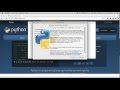

In [11]:
#把東西import好
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 建立 driver
driver = webdriver.Firefox()
 
# 去 google
driver.get("http://www.google.com")
 
# 顯示標題
print(driver.title)
 
'''
最關鍵的一步:

首先使用F12開法者工具，屬標點選搜尋框看CSS全文:
<input class="gsfi" id="lst-ib" maxlength="2048" name="q" autocomplete="off" title="搜尋" 
value="" aria-label="搜尋" aria-haspopup="false" role="combobox" aria-autocomplete="both" ...type="text">

法1 可以用name來找搜尋框
inputElement = driver.find_element_by_name("q")

法2 可以用id來找搜尋框
inputElement = driver.find_element_by_id("lst-ib")

法3 可以用class來找搜尋框
inputElement = driver.find_element_by_class_name("gsfi")

'''

# 用name找到搜尋框
inputElement = driver.find_element_by_name("q")

 
# 搜尋框輸入字
inputElement.send_keys("python")

# 提交
inputElement.submit()

'''
提交方法2: 用Enter打入
inputElement.send_keys(Keys.ENTER)
'''
 
try:
    # 停10秒直到標題有 python
    WebDriverWait(driver, 10).until(EC.title_contains("python"))
    
    '''
    條件等待，方法2:
    wait =  WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.ID,'content_left')))
    
    '''
    
    # 顯示標題，可看到 cheese
    print(driver.title)
    print(driver.current_url)
    print(driver.get_cookies())
    print(driver.page_source)

except TimeoutException:
    print('time out')

# 關閉視窗
finally:
    driver.quit() 

# 建立driver

In [58]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 需下載 driver 才能用
driver = webdriver.Firefox(executable_path=r'geckodriver.exe')

# 可更改 firefox 的 profile
profile = webdriver.FirefoxProfile()
profile.native_events_enabled = True
driver = webdriver.Firefox(profile)

# 目前網址
print(driver.current_url)

# 截圖
driver.save_screenshot('foo.png')

# 原始碼 driver.page_source
with open('test.html','wb') as file:
    file.write(driver.page_source.encode('utf-8'))

'''
with之後的運算式傳回的物件，可以使用as指定給變數來參考，
file所參考到的物件，最後會被自動關閉，
即使在with as的區塊中發生了例外，最後一定會關閉file所參考的物件。
'''    

# 標題
print(driver.title)

# 重新整理
driver.refresh()

# 關閉目前視窗
driver.close()

about:blank



# 聲明瀏覽器對象

In [ ]:
from selenium import webdriver
browser = webdriver.Chrome()
browser = webdriver.Firefox()
browser = webdriver.Edge()
browser = webdriver.PhantomJS()
browser = webdriver.Safari()

# 訪問網頁

In [16]:
browser = webdriver.Firefox()
browser.get('http://google.com')

print(browser.title)
browser.close()

Google


# 尋找元素

一個元素

In [29]:
from selenium import webdriver

browser = webdriver.Firefox()
browser.get('http://google.com')

#以下三種方法搜尋到的元素是相同的
input_1 = browser.find_element_by_name('q')
input_2 = browser.find_element_by_css_selector('.gsfi') #若是class前面加.，id前面加#
input_3 = browser.find_element_by_xpath('//*[@name="q"]')

input_4 = browser.find_element_by_tag_name("input")#含有多個，結果不同，不好用

'''

透過 id 抓取 element，呼叫 find_element_by_css_selector() 帶入的參數為 id 屬性值前面加上「#」，
此方法與 find_element_by_id() 執行結果一樣。
find_element_by_css_selector("#igl")
find_element_by_id("igl")

透過 class 抓取 element，帶入的參數為 class 屬性值前面加上「.」，結果與 find_element_by_class_name() 一樣。
find_element_by_css_selector(".cgl")
find_element_by_class_name("cgl")

透過節點名稱抓取 element，參數直接帶入節點的名稱，與 find_element_by_tag_name() 執行結果一樣。
find_element_by_css_selector("input")
find_element_by_tag_name("input")

'''

print(input_1)
print(input_2)
print(input_3)
print(input_4)

browser.close()

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="58dd6260-bb5c-416c-92ee-dda8188c3d08", element="38586225-f175-461b-bfae-0ab354a815a1")>
<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="58dd6260-bb5c-416c-92ee-dda8188c3d08", element="38586225-f175-461b-bfae-0ab354a815a1")>
<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="58dd6260-bb5c-416c-92ee-dda8188c3d08", element="38586225-f175-461b-bfae-0ab354a815a1")>
<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="58dd6260-bb5c-416c-92ee-dda8188c3d08", element="5e740b44-2c32-4a56-b907-5cd6d78b7426")>


搜尋標籤的元素

通用型

In [35]:
from selenium import webdriver

#請注意import
from selenium.webdriver.common.by import By

print()

browser = webdriver.Firefox()
browser.get('http://google.com')

#通用搜尋法
input_1 = browser.find_element(By.NAME,'q')

print(input_1)
browser.close()

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="dc920949-6fa5-4202-9c08-c65d84377c20", element="7450a0c8-f148-4862-9f33-c874c8eb0eb3")>


多個元素

In [39]:
from selenium import webdriver
import pprint

browser = webdriver.Firefox()
browser.get('https://www.google.com.tw/search?q=python&ie=utf-8&oe=utf-8&gws_rd=cr&ei=Xa9hWdGtIonO0gT_wpIw')

#多加一個s
inputs = browser.find_elements_by_css_selector('.r')
#是用list回傳整張表，想要取出單個再用index的方法，input[0]回傳就好啦!!

#使用pprint增加一下美感
pprint.pprint(inputs)

browser.close()

[<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="45bc14a0-5420-423a-a603-51f11a4b0fc2")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="d018e761-6545-41fe-92ea-16cfcc84cef4")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="cd5bb02a-3810-47c2-97ca-84c545044566")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="7ab3a250-a211-4395-98ac-f4f1228d52a2")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="d45ae6f0-13fe-4a47-9b65-0c7a4f375efa")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="bb9b433e-422b-4a29-a886-ea28a69296b4", element="5f9e14d4-5bb7-48c2-aeb2-0c906bc8bf03")>,
 <selenium.webdriver.firefox.webelement.FirefoxWebElement 

# 元素交互作用

對於獲取的元素調用的交互方法

In [55]:
from selenium import webdriver
import time

from selenium.webdriver.common.keys import Keys

browser = webdriver.Firefox()
browser.get("http://www.google.com")

input = browser.find_element_by_name('q')
input.send_keys('iPhone')

time.sleep(1) #停1秒

input.clear() #刪除所寫

input.send_keys('iPad')
time.sleep(1) #停1秒

input.send_keys(Keys.ENTER)

# button = browser.find_element_by_name('btnK')
# button.click() #點擊該元素，可惜這題不能這樣用，因為google把位置亂弄會點到其他格子

# 交互動作

將附加動作加到動作鏈串中執行 可以到ActionChains去查更多動作

In [59]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Firefox()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)

browser.switch_to.frame('iframeResult')
source = browser.find_element_by_class_name('ui-draggable')
target = browser.find_element_by_class_name('ui-droppable')

#做拖曳的動作
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
actions.perform()

# 執行Javascript

In [68]:
from selenium import webdriver

browser = webdriver.Firefox()
browser.get("https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript")

#拉到網頁下端，可是找不到value field?
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')

#跳出警告視窗
browser.execute_script('alert("To Bottom")')

WebDriverException: Message: Failed to find value field


# 獲取元素訊息

獲取屬性: element.get_attribute('')

In [71]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Firefox()
url = "https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript"
browser.get(url)

button = browser.find_element_by_class_name('gb_Bf')
print(button)
print(button.get_attribute('class'))

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="92057363-8eed-4844-be44-c82ec4da91ec", element="6201b3ad-b129-43ef-b32f-8f489ddac072")>
gb_Bf gb_Ha gb_xb


# 獲取文本值 element.text

In [24]:
#提取「登入」按鈕的登入文字

from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

browser = webdriver.Firefox()
url = "https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript"
browser.get(url)
 
button = browser.find_element_by_id('gb_70')

#要等一下才看的到text
import time
time.sleep(1)

#隱性等待
browser.implicitly_wait(1)

#顯性等待，其中By.ID,'gb_70'被稱為是locator
WebDriverWait(browser, 10).until(EC.text_to_be_present_in_element((By.ID,'gb_70'), '登入'))

print(button.text)
browser.close()

登入


# 獲取ID、標籤、標籤名、大小

element.id, location, tag_name, size

In [1]:
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

browser = webdriver.Firefox()
url = "https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript"
browser.get(url)
 
button = browser.find_element_by_id('gb_70')
print(button.id)
print(button.location)
print(button.tag_name)
print(button.size)

browser.close()

07230f6e-b358-4a47-a9ae-7bf6faa355ca
{'x': 1186, 'y': 16}
a
{'height': 29.600006103515625, 'width': 52.8000030517578}


# Frame (查找躲在frame裡面的元素)

browser.switch_to.frame('id') 進入框框

browser.switch_to.parent_frame() 回到母框

In [15]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Firefox()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)

#進入到小frame裡頭
browser.switch_to.frame('iframeResult')
source = browser.find_element_by_class_name('ui-draggable')
print(source)

try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException:
    print("No Logo")

#要回到大的frame才能找Logo
browser.switch_to.parent_frame()

logo = browser.find_element_by_class_name('logo')
print(logo)

time.sleep(1)
print(logo.text)

browser.close()

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d06bde22-a30a-47c0-a333-b64b1f4e5a56", element="67dc6534-b4b4-46a0-b04e-f22ee241c8b9")>
No Logo
<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d06bde22-a30a-47c0-a333-b64b1f4e5a56", element="1456de98-83e9-4c89-98a5-0f97eef8490e")>
RUNOOB.COM


# 等待，讓元素飛一會兒才找的到

# Implicit waiting

.implicitly_wait()

In [13]:
from selenium import webdriver

browser = webdriver.Firefox()
url = "https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript"
browser.get(url)

browser.implicitly_wait(2)
button = browser.find_element_by_id('gb_70')

browser.implicitly_wait(2)
print(button)

browser.close()

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="3a25f141-6fdb-46a8-a702-e3802a8f5e8b", element="e13d7b81-f74c-4769-982a-d0415685d88b")>


# Explicit waiting

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

browser = webdriver.Firefox()
url = "https://www.google.com.tw/?gfe_rd=cr&ei=Y8dhWaLsAuWm8wfZ5p3ADg&gws_rd=ssl#q=javascript"
browser.get(url)

wait = WebDriverWait(browser, 10)
#等到ID出現
input_1 = wait.until(EC.presence_of_element_located((By.ID,'gb_70')))
#等到可以點擊
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#gb_70')))

print(input_1, button)

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="c06b1d8c-e26c-45c1-a39b-2aa4f5001b7c", element="cee188d6-f8d6-454a-812b-4b886e885418")> <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="c06b1d8c-e26c-45c1-a39b-2aa4f5001b7c", element="cee188d6-f8d6-454a-812b-4b886e885418")>


# 前進後退

In [25]:
import time
from selenium import webdriver

browser = webdriver.Firefox()
browser.get("https://www.google.com.tw")
browser.get("https://www.yahoo.com.tw")
browser.get("https://seleniumhq.github.io/selenium/docs/api/py/index.html")

#上一頁
browser.back()
time.sleep(1)
#下一頁
browser.forward()
time.sleep(1)
browser.close()

# Cookies

In [31]:
import pprint
from selenium import webdriver

browser = webdriver.Firefox()
browser.get("https://www.google.com.tw")

#印出初始版本
pprint.pprint(browser.get_cookies())

#開字典填入cookies
browser.add_cookie({'name':'name','domain':'www.google.com.tw','value':'germany'})

#印出第二版本
pprint.pprint(browser.get_cookies())
browser.delete_all_cookies()

#印出第三版本
pprint.pprint(browser.get_cookies())

[{'domain': '.google.com.tw',
  'expiry': None,
  'httpOnly': True,
  'name': 'NID',
  'path': '/',
  'secure': False,
  'value': '107=dx4JywXGN9uQ4i7PNTA5tvDp_EuiDfQfiFx3V5P0XhqPxXYsyMN_mxr8HW6KHcy1xyeLyRVM1ktrGj1UCauB6vfE6hy2cM7YYrmXda380QOeutrzOQjeNLyRITmbFSmX'},
 {'domain': '.google.com.tw',
  'expiry': None,
  'httpOnly': False,
  'name': 'OGPC',
  'path': '/',
  'secure': False,
  'value': '5061821-1:'}]
[{'domain': '.google.com.tw',
  'expiry': None,
  'httpOnly': True,
  'name': 'NID',
  'path': '/',
  'secure': False,
  'value': '107=dx4JywXGN9uQ4i7PNTA5tvDp_EuiDfQfiFx3V5P0XhqPxXYsyMN_mxr8HW6KHcy1xyeLyRVM1ktrGj1UCauB6vfE6hy2cM7YYrmXda380QOeutrzOQjeNLyRITmbFSmX'},
 {'domain': '.google.com.tw',
  'expiry': None,
  'httpOnly': False,
  'name': 'OGPC',
  'path': '/',
  'secure': False,
  'value': '5061821-1:'},
 {'domain': 'www.google.com.tw',
  'expiry': None,
  'httpOnly': False,
  'name': 'name',
  'path': '',
  'secure': False,
  'value': 'germany'}]
[]


# 標籤頁管理

In [32]:
import time
from selenium import webdriver

browser = webdriver.Firefox()
browser.get("https://www.google.com.tw")

#打開新標籤頁
browser.execute_script('window.open()')
print(browser.window_handles)
#也可以使用瀏覽器輸入快捷鍵指令speical keys新增分頁!!

#切換到第一新分頁
browser.switch_to_window(browser.window_handles[1])
browser.get("https://www.google.com.tw")

time.sleep(1)

#切換回初始分頁
browser.switch_to_window(browser.window_handles[0])
browser.get("https://python.org")

['13', '23']


# 異常處理 TimeoutException, NoSuchElementException

In [33]:
#故意製造異常

from selenium import webdriver

browser = webdriver.Firefox()
browser.get("https://www.google.com.tw")
browser.find_element_by_id("hello")

NoSuchElementException: Message: Unable to locate element: [id="hello"]


In [35]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException

browser = webdriver.Firefox()

try:
    browser.get("https://www.google.com.tw") 
except TimeoutException:
    print('Time out!!')

try:
    browser.find_element_by_id("hello")
except NoSuchElementException:
    print('No element!!')
finally:
    browser.close()

No element!!


# 實戰練習

## 爬取Diagnosaurus®的A-Z所有DDx名稱

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Firefox()
list_alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','V','W','X','Y','Z']
f = open('DDx All.txt','w',encoding = 'UTF-8')
f.write("DDx All as below")
f.close()

for i in range(26):
    url = "https://accessmedicine.mhmedical.com/Diagnosaurus.aspx?categoryid=41309&selectedletter="+str(list_alphabet[i])
    browser.get(url)

    browser.implicitly_wait(5)
    DDx_list = browser.find_elements_by_id('leftNav')

    print(str(list_alphabet[i])+": "+str(len(DDx_list))+" ddx\n")
          
    f = open("DDx All.txt",'a',encoding = 'UTF-8')
    f.write(str(list_alphabet[i])+": "+str(len(DDx_list))+" ddx\n")
            
    with open("DDx All.txt",'a',encoding = 'UTF-8') as f:
        for i in range(len(DDx_list)):
            f.write(DDx_list[i].text+"\n")

f.close()
browser.close()

A: 134 ddx



KeyboardInterrupt: 

# 爬取Tumblr上的圖片

In [3]:
'''
目標: 不需要打開瀏覽器，連上tumblr網站，自動登入帳號密碼，抓取前10張圖片

1. 進入tumblr登入頁面
2. 輸入帳號，點選下一頁
3. 輸入密碼，點選登入，進入主畫面
4. 找到圖片的url，寫入圖片檔案

'''

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


import requests
import re

import time

#進入tumblr登入頁面
browser = webdriver.Firefox()
login_url = 'https://www.tumblr.com/login?redirect_to=%2Fnew%2Flink%2F'
tumblr_login = browser.get(login_url)

#以下用Selenium寫最快

#輸入帳號，點選下一頁
inputUsername = browser.find_element_by_name('determine_email')
inputUsername.send_keys('')
inputUsername.send_keys(Keys.ENTER)
time.sleep(2)

#輸入密碼，點選登入，進入主畫面
inputPassword = browser.find_element_by_name('user[password]')
inputPassword.send_keys('')
inputPassword.send_keys(Keys.ENTER)
time.sleep(10)

#進入主畫面了，找到圖片的url

#用selenium找才完整
#tumblr_content = browser.page_source
browser.refresh()
tumblr_content = requests.get('https://www.tumblr.com/dashboard').text
print(tumblr_content)

#似乎擋住了python selenium跟requests的方法呢!!無解

pic_url = re.findall('data-pin-description.*?href="(.*?)".*?class="photoset_photo rapid-noclick-resp">', tumblr_content, re.S)
pic_name = pic_url

#寫入圖片檔案
for i in range(len(pic_url)):
    pic = requests.get(pic_url[i])
    print(pic_url[i]+"\n")
    
    """
    with open(pic_name, 'wb') as f:
        f.write(pic.content)
        f.close()
    """
browser.close()

<!DOCTYPE html><!--
       .o                                .o88       .o88
      .88                                "888       "888
    o8888oo  ooo  oooo  ooo. .oo.  .oo.   888oooo.   888  oooo d8b
    ""888""  888  "888  "888P"Y88bP"Y88b  d88' `88b  888  "888""8P
      888    888   888   888   888   888  888   888  888   888
      888 .  888   888   888   888   888  888.  888  888   888    .o.
      "888Y  `V88V"V8P' o888o o888o o888o 88`bod8P' o888o d888b   Y8P

                                                                        --><!--[if lt IE 7]>      <html class="no-js ie ie6 lt-ie9 lt-ie8 lt-ie7 loginandregister-context en_US" lang="en-US"> <![endif]--><!--[if IE 7]>         <html class="no-js ie ie7 lt-ie9 lt-ie8 loginandregister-context en_US" lang="en-US"> <![endif]--><!--[if IE 8]>         <html class="no-js ie ie8 lt-ie9 loginandregister-context en_US" lang="en-US"> <![endif]--><!--[if IE 9]>         <html class="no-js ie9 loginandregister-context en_US" lang="en-US"